<a href="https://colab.research.google.com/github/rpizarrog/Analisis-Inteligente-de-datos/blob/main/bloc%20de%20notas/Caso_6_Regresi%C3%B3n_Lineal_Simple_Validacion_Cruzada%2C_eficiencia_del_modelo_y_predicciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso 6. Regresión Lineal Simple. Validacion Cruzada, eficiencia del modelo y predicciones
## Autor: Rubén Pizarro
## Fecha: 29-Oct-2021

# Objetivo

Aplicar un modelo de regresión lineal simple mediante validación cruzada a datos de poblacion y casos COVID evaluando los estadísticos del modelo y la eficiencia del modelo, con ello determinar predicciones para su adecuada interpretación.

# Descripción

Se realizan las siguientes acciones: 

* Se cargan las librerías adecuadas
* Se cargan los datos
  * Cargar datos de cantidad de habitantes de una población de municipios y sus casos confirmados de COVID. Los datos son casos confirmados en periodo de 02-02-2020 al 18-09-2021 en formado DD-MM-AAAA (dia-mes-año).
Archivo csv localizado en: github.
  * Fuente obtenida de datos del gobierno de México de texto del vínculo. 
* Se describe los datos
* Se encuentra el valor de la correlación para ver la relación entre las dos variables
* Se visualiza datos medainte el hisograma y la dispersión de las variables independiente población y dependiente confirmados.
* Se determinan los datos de entrenamiento y los datos de validación
* Se crea el modelo
* Se intrepreta el estadístico de R Square
* Se hacen predicciones
* Se realizan interpretaciones del caso

# Desarrollo

## Cargar librerías







In [2]:
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import  pearsonr # Para correlación
from sklearn.linear_model import LinearRegression # Para regresión
from sklearn.model_selection import train_test_split # Partir datos
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score # R Square
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Cargar datos



In [3]:

datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/poblacion%20confirmados%20municipio.csv")

datos.shape # La estructura de los datos

(2457, 4)

### Describir los datos
Mostrando los datos


In [4]:
datos

,cve_ent,nombre,poblacion,confirmados
0,16046,Juarez,15290,203
1,16047,Jungapeo,22358,92
2,16048,Lagunillas,5862,53
3,16049,Madero,18769,72
4,5035,Torreon,744247,19402
...,...,...,...,...
2452,32053,Villa Gonzalez Ortega,13945,142
2453,32054,Villa Hidalgo,20177,112
2454,32055,Villanueva,31804,497
2455,32056,Zacatecas,155533,9764


Análisis descriptivo

In [5]:
datos[["poblacion", "confirmados"]].describe() # Estadísticos elementales

,poblacion,confirmados
count,2.457000e+03,2457.000000
mean,5.201151e+04,1452.297924
std,1.475537e+05,7135.481990
min,9.500000e+01,0.000000
25%,4.470000e+03,18.000000
50%,1.413700e+04,87.000000
75%,3.709900e+04,390.000000
max,1.815551e+06,147221.000000


## Histograma

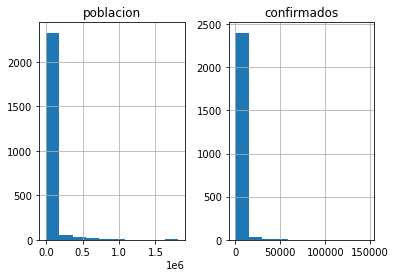

In [6]:
datos[["poblacion", "confirmados"]].hist()
plt.show()

## Correlación

Se encuentra la correlación entre la variable independiente poblción con la variable dependiente confirmados.


In [7]:
corr_test = pearsonr(x = datos['poblacion'], y =  datos['confirmados'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.7955600277967804
P-value:  0.0


Fórmula de Correlación de Parson:

$$
\displaystyle \text{Coef. de correlación de Pearson} (r) = \frac{cov(x,y)} {s_xs_y} =\frac{\sum(x_i-\bar{x})(yi-\bar{y})} {(N-1)s_xs_y}\\
$$


De acuerdo a la tabla de correlación de Pearson siguiente: 
Se emplean como medida de la fuerza de asociación entre dos variables (tamaño del efecto):

* 0: asociación nula.
* 0.1: asociación pequeña.
* 0.3: asociación mediana.
* 0.5: asociación moderada.
* **0.7: asociación alta.**
* 0.9: asociación muy alta.

El grado de relación es una asociación entre las variables población y casos confirmados es alta de acuerdo al valor de la Correlación de Pearson.

Se sacan vectores de poblacion y confirmados respectivamente


### Diagrama de dispersión

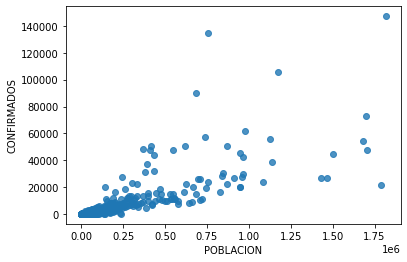

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=datos["poblacion"], y=datos["confirmados"], alpha= 0.8)
ax.set_xlabel('POBLACION')
ax.set_ylabel('CONFIRMADOS');

## Validación cruzada

La validación cruzada consiste en dividir el conjunto de datos en dos partes:

datos de entrenamiento para crear el modelo y evaluar la eficiencia del mismo y datos de validación para probar el modelo haciendo prediccciones

Se utilizan las variables siguientes: 
  * X_entrena_poblacion Son los valores de poblacion para entrenar el modelo
  * X_valida_poblacion. Son los valores de poblacion para probar el modelo
  * y_entrena_poblacion. Son los valores de confirmados para entrenar el 
  modelo
  * y_valida_confirma. Son los valores de confirmados con los cuales se compara las predicciones 

* datos de validación para probar el modelo haciendo prediccciones

### Partiendo los datos


In [9]:
poblacion = datos[['poblacion']]
confirmados = datos['confirmados']
# poblacion
# confirmados


In [10]:
entrena_poblacion, valida_poblacion, entrena_confirma, valida_confirma = train_test_split(
                                        poblacion.values.reshape(-1,1),
                                        confirmados.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 2021,
                                        shuffle      = True
                                    )


Los datos de entrenamiento representan el 80% del total de los datos y el 20% es para datos de validación.

El modelo se construye con los datos de entrenamiento, en este caso con las variables identificados con entrena_poblacion y entrena_confirma



## Construyendo el modelo
Se construye el modelo de regresión lineal


In [11]:
modelo = LinearRegression()
modelo.fit(X = entrena_poblacion.reshape(-1, 1), y = entrena_confirma)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluando el modelo




In [12]:
print("Coeficiente de la intercepción:", modelo.intercept_)
print("Coeficiente de la pendiente", modelo.coef_)
print("Coeficiente de determinación R^2 o R Square:", modelo.score(X = entrena_poblacion, y = entrena_confirma))

Coeficiente de la intercepción: [-498.98263469]
Coeficiente de la pendiente [[0.03636327]]
Coeficiente de determinación R^2 o R Square: 0.6231784216977491


El valor de coeficiente de determinación 0.6231784216977491 en regresión lineal simple significa la representatividad que tiene la población con respecto a los casos confirmados o lo que es lo mismo, el valor de la población representa un 62.31% el valor de los casos confirmados.

R2  describe la proporción de varianza de la variable respuesta explicada 
por el modelo y relativa a la varianza total.

R2 explica la variabilidad de los datos de la variable de respuesta, o la variable independiente población explica en un 62% la variable confirmados.



## Predicciones

Realizar cinco predicciones con los datos de validacion

Predecir casos confirmados con 31803

Se tiene la certeza que la rpedicción de casos confirmados rerepsenta es representada en un 60% aproximadamente.




In [21]:
prediccion = modelo.predict([[31803]]) 
print(int(prediccion))

657



# Interpretación

¿Que te deja el caso?, describir un párrafo sobre el conenido del caso.
¿Qué significa el valor de correlación de Kendak?
¿Porqué y para qué usar datos de entrenamiento y de validación en los modelos de machine learning?
¿Que significa el valor de R Square en la regresión lineal y lo que representan en las predicciones?

Para la predicción una de 31803 habitantes se estima una cantidad de 657 casos confirmados de acuerdo y conforme a un modelo de regresión lineal que tienen un valor de 62.31% como coficiente de determinación que significa lo que representa población a los casos conirmados del conjuto de datos.

